##### Import Libraries

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

##### Load Data

In [2]:
df = pd.read_csv("iris.csv")         # Reading the dataset to Data Frame

##### Explore Data

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

The statistics about the dataset

In [6]:
y=df["Species"]                                                     # predict this (Dependent Variable)
x=df.drop(columns=['Species'])

Split the Dataset for Testing and Training

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=df.Species)

In [8]:
x_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
98,99,5.1,2.5,3.0,1.1
68,69,6.2,2.2,4.5,1.5
19,20,5.1,3.8,1.5,0.3
143,144,6.8,3.2,5.9,2.3
99,100,5.7,2.8,4.1,1.3


In [9]:
x_train.shape

(105, 5)

In [10]:
y_train.value_counts()

Species
Iris-versicolor    35
Iris-setosa        35
Iris-virginica     35
Name: count, dtype: int64

### Train the model

In [11]:
tree_clf = DecisionTreeClassifier(max_depth=12)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=12)

In [12]:
tree_clf.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
export_graphviz(
                 tree_clf,
                 out_file="iris.dot",
                 feature_names=x.columns,
                 class_names=tree_clf.classes_,
                 rounded=True,
                 filled=True
                )

You can visualize the dot file at <a href="http://www.webgraphviz.com" target="_blank">www.webgraphviz.com</a>

### Accuracy of the model:

In [14]:
print("Training set accuracy: {:.3f}".format(tree_clf.score(x_train, y_train)))
print("Testing set accuracy: {:.3f}".format(tree_clf.score(x_test, y_test)))

Training set accuracy: 1.000
Testing set accuracy: 1.000


In [15]:
actual = y_test
predicted = tree_clf.predict(x_test)

### Test the Model

In [16]:
tree_clf.feature_importances_

array([0.5, 0. , 0. , 0.5, 0. ])

In [17]:
x.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [18]:
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

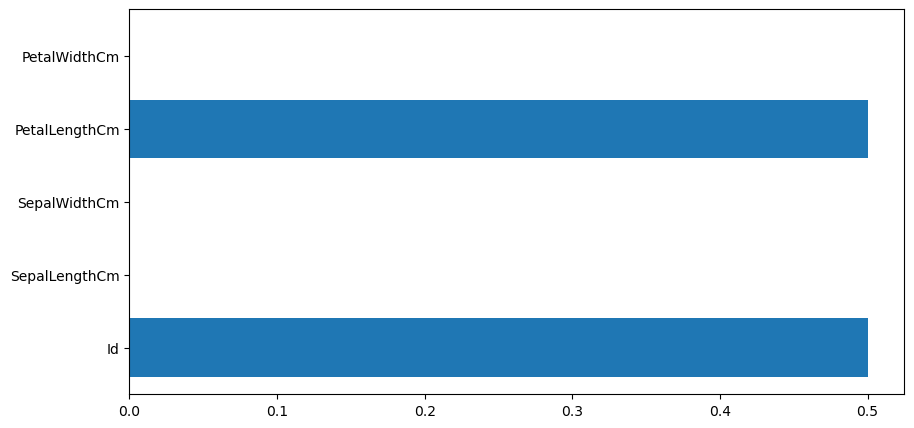

In [19]:
plt.figure(figsize=(10,5))
plt.barh(x.columns,tree_clf.feature_importances_)

In [20]:
import pickle

In [21]:
f=open("irisDTClassifi.pkl","wb")
pickle.dump(tree_clf, f)
f.close()